<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **PROYECTO**

**Reto: Predict CO2 emissions in Rwanda**

**Inteligencia artificial para las ciencias y las ingenierías**

*Facultad de Ingeniería*


**Integrantes:**

* Samuel Gacía Bonilla, CC.1000295970, Ingeniería Eléctrica

* Jhon Fredy Hoyos Cardenas, CC.1045025784 , Ingeniería de Sistemas

* Juan José Bustamante Betancur, CC.1001371385, Ingeniería Eléctrica


**Dataset**

Se hizo una búsqueda de un dataset, en la plataforma Kaggle, que reuniera los requerimientos necesarios para poder llevar a cabo el proyecto ([aquí](https://www.kaggle.com/competitions/playground-series-s3e20/data?select=train.csv) se puede encontrar la página de la competencia).


Para el dataset se seleccionaron aproximadamente 497 ubicaciones únicas de múltiples zonas de Ruanda, con una distribución en torno a tierras de cultivo, ciudades y centrales eléctricas. Los datos para esta competición se dividen por tiempo; los años 2019 - 2021 se incluyen en los datos de entrenamiento (train.csv), y el objetivo es predecir los datos de emisiones de CO2 de 2022 a noviembre.


Se extrajeron siete características principales semanalmente del Sentinel-5P desde enero de 2019 hasta noviembre de 2022. Cada característica (dióxido de azufre, monóxido de carbono, etc.) contiene subcaracterísticas como column_number_density, qué es la densidad de columna vertical a nivel del suelo, calculada mediante la técnica DOAS. Se dan los valores de estas características en el conjunto de pruebas y se busca predecir las emisiones de CO2utilizando información temporal, así como estas características.


* Dióxido de azufre
* Monóxido de carbono
* Dióxido de nitrógeno
* Formaldehído


# Lectura del dataset

In [ ]:
# Los datasets se encuentran en un repositorio en Gitlab, se usa wget para descargarlos
!wget -O train.csv https://gitlab.com/fredy.hoyos1/iamireligion/-/raw/a2e8edb223037ba0c74b2aa801e6dce28218f471/train.csv?inline=false
!wget -O test.csv https://gitlab.com/fredy.hoyos1/iamireligion/-/raw/datos/test.csv?inline=false
!wget -O sample_submission.csv https://gitlab.com/fredy.hoyos1/iamireligion/-/raw/datos/sample_submission.csv?inline=false

--2023-10-21 22:21:01--  https://gitlab.com/fredy.hoyos1/iamireligion/-/raw/a2e8edb223037ba0c74b2aa801e6dce28218f471/train.csv?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91276119 (87M) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>]  87.05M  99.3MB/s    in 0.9s    

2023-10-21 22:21:02 (99.3 MB/s) - ‘train.csv’ saved [91276119/91276119]

--2023-10-21 22:21:02--  https://gitlab.com/fredy.hoyos1/iamireligion/-/raw/datos/test.csv?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27625491 (26M) [application/octet-stream]
Saving to: ‘test.csv’

test.csv            100%[===================>

In [ ]:
import pandas as pd

# Carga de los archivos CSV
t_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_df = pd.read_csv("sample_submission.csv")

# Mostrar en pantalla las primeras 10 filas del dataset
t_df.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,ID_-0.510_29.290_2019_05,-0.51,29.29,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,ID_-0.510_29.290_2019_06,-0.51,29.29,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
7,ID_-0.510_29.290_2019_07,-0.51,29.29,2019,7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,...,3468.924146,63697.007267,2597.071563,20.533600,0.250168,16.374829,35.840248,-122.250699,20.432005,4.251361
8,ID_-0.510_29.290_2019_08,-0.51,29.29,2019,8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,...,3160.264670,67222.556159,2530.851476,24.253928,0.260543,-12.021751,42.688789,-114.296369,22.365602,4.281937
9,ID_-0.510_29.290_2019_09,-0.51,29.29,2019,9,0.000056,0.998541,0.000014,0.157726,-100.108744,...,4141.073340,60298.717969,3510.293652,13.813379,0.289295,-66.258392,28.596211,-105.687177,21.084021,4.352933


# Procesamiento de los datos

In [ ]:
# Importación de librerías para el procesamiento de datos

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta


In [ ]:
# Tamaño del dataset orginial

t_df.shape

(79023, 76)

In [ ]:
# Modificación del dataset original
# Se remueven columnas que no son necesarias para el análisis

remove = [col for col in t_df.columns if 'UvAerosolLayer' in col]
train_df = t_df.drop(columns= remove) # Nueva variable para el dataset
train_df.shape

(79023, 69)

Se agregan las columnas categóricas faltantes que corresponden a la columna cuartil y a la columna mes

* **Quartile**


In [ ]:
# Crear columna Quartile

# Crear un DataFrame con una columna que siga el patrón 1, 2, 3, 4 repetido hasta 79023

patron = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
          4, 4, 4, 4, 4, 4]
repeticiones = 79023 // len(patron)  # Calcula cuántas veces se debe repetir el patrón
columna = patron * repeticiones  # Crea la columna con el patrón repetido

# Completa la columna con los valores restantes si es necesario
faltantes = 79023 - len(columna)
columna += patron[:faltantes]

train_df['Quartile'] = columna

* **month**

In [ ]:
# Crear columna month_no

# Se crea una función para obtener el número de mes a partir del número de semana y año

def mes(row):
    """
    Función que permite sacar el mes a partir del número de la semana.
    """
    año_base = row['year']
    semana = row['week_no']

    # Calculamos la fecha del primer día del año
    primer_dia_del_año = datetime(año_base, 1, 1)
    # Calculamos la fecha correspondiente al inicio de la semana dada
    fecha_inicio_semana = primer_dia_del_año + timedelta(weeks=semana)
    # Obtenemos el número de mes
    numero_mes = fecha_inicio_semana.month

    return numero_mes

# Se aplica la función a las filas del DataFrame y creamos una nueva columna 'mes'
train_df['month_no'] = train_df.apply(mes, axis=1)

In [ ]:
# Desplazamiento de las columnas

# Especifica el nombre de la columna que deseas mover
columna_a_mover = 'month_no'
columna_a_mover1 = 'Quartile'

# Elimina la columna de su posición actual y guárdala en una variable temporal
columna_temporal = train_df.pop(columna_a_mover)
columna_temporal1 = train_df.pop(columna_a_mover1)

# Inserta la columna en la nueva posición
nueva_posicion = 5  # Puedes ajustar esta posición según tus necesidades
nueva_posicion1 = 6

train_df.insert(nueva_posicion, columna_a_mover, columna_temporal)
train_df.insert(nueva_posicion1, columna_a_mover1, columna_temporal1)

# Muestra el DataFrame resultante
train_df.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,month_no,Quartile,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,1,1,-0.000108,0.603019,-0.000065,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,1,1,0.000021,0.728214,0.000014,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,1,1,0.000514,0.748199,0.000385,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,1,1,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,1,1,-0.000079,0.676296,-0.000048,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,ID_-0.510_29.290_2019_05,-0.51,29.29,2019,5,2,1,0.000294,0.871713,0.000242,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,ID_-0.510_29.290_2019_06,-0.51,29.29,2019,6,2,1,-0.000285,0.791956,-0.000226,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
7,ID_-0.510_29.290_2019_07,-0.51,29.29,2019,7,2,1,-0.000016,0.976311,-0.000016,...,3468.924146,63697.007267,2597.071563,20.533600,0.250168,16.374829,35.840248,-122.250699,20.432005,4.251361
8,ID_-0.510_29.290_2019_08,-0.51,29.29,2019,8,2,1,-0.000115,0.796941,-0.000101,...,3160.264670,67222.556159,2530.851476,24.253928,0.260543,-12.021751,42.688789,-114.296369,22.365602,4.281937
9,ID_-0.510_29.290_2019_09,-0.51,29.29,2019,9,3,1,0.000056,0.998541,0.000014,...,4141.073340,60298.717969,3510.293652,13.813379,0.289295,-66.258392,28.596211,-105.687177,21.084021,4.352933


In [ ]:
# Se definen las variables categóricas
train_df['ID_LAT_LON_YEAR_WEEK'] = train_df['ID_LAT_LON_YEAR_WEEK'].astype('category')
train_df['latitude'] = train_df['latitude'].astype('category')
train_df['longitude'] = train_df['longitude'].astype('category')
train_df['year'] = train_df['year'].astype('category')
train_df['week_no'] = train_df['week_no'].astype('category')
train_df['month_no'] = train_df['month_no'].astype('category')
train_df['Quartile'] = train_df['Quartile'].astype('category')

In [ ]:
# Se muestran el tipo de cada una de las columnas
for c in train_df.columns:
    print ("%20s"%c, train_df[c].dtype)

ID_LAT_LON_YEAR_WEEK category
            latitude category
           longitude category
                year category
             week_no category
            month_no category
            Quartile category
SulphurDioxide_SO2_column_number_density float64
SulphurDioxide_SO2_column_number_density_amf float64
SulphurDioxide_SO2_slant_column_number_density float64
SulphurDioxide_cloud_fraction float64
SulphurDioxide_sensor_azimuth_angle float64
SulphurDioxide_sensor_zenith_angle float64
SulphurDioxide_solar_azimuth_angle float64
SulphurDioxide_solar_zenith_angle float64
SulphurDioxide_SO2_column_number_density_15km float64
CarbonMonoxide_CO_column_number_density float64
CarbonMonoxide_H2O_column_number_density float64
CarbonMonoxide_cloud_height float64
CarbonMonoxide_sensor_altitude float64
CarbonMonoxide_sensor_azimuth_angle float64
CarbonMonoxide_sensor_zenith_angle float64
CarbonMonoxide_solar_azimuth_angle float64
CarbonMonoxide_solar_zenith_angle float64
NitrogenDioxide_NO2_colum

## Limpieza de datos

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = train_df.select_dtypes(include=['number'])

# Reemplazar los valores nulos en las columnas numéricas
columnas_numericas_filled = columnas_numericas.fillna((columnas_numericas.ffill() + columnas_numericas.bfill()) / 2)

# Mantener las columnas categóricas sin cambios
train_df = pd.concat([columnas_numericas_filled, train_df.select_dtypes(exclude=['number'])], axis=1)

# Se muestra el DataFrame resultante
train_df.head(10)

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,month_no,Quartile
0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,...,-138.786423,30.752140,3.750994,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,1,1
1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,...,-145.183930,27.251779,4.025176,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,1,1
2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,...,-142.519545,26.193296,4.231381,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,1,1
3,0.000218,0.712247,0.000169,0.115591,38.458553,44.192202,-143.800458,23.769194,0.000063,0.036790,...,-132.665828,28.829155,4.305286,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,1,1
4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,24.331972,-0.000028,0.034675,...,-141.509805,22.204612,4.347317,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,1,1
5,0.000294,0.871713,0.000242,0.227656,-13.453690,57.097124,-136.616859,23.408866,0.000076,0.035296,...,-137.388719,21.157820,4.310819,ID_-0.510_29.290_2019_05,-0.51,29.29,2019,5,2,1
6,-0.000285,0.791956,-0.000226,0.119397,72.198647,58.496368,-143.726913,15.767768,-0.000088,0.032866,...,-128.196338,21.721202,4.269334,ID_-0.510_29.290_2019_06,-0.51,29.29,2019,6,2,1
7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,23.739841,-114.887650,24.024235,-0.000008,0.036543,...,-122.250699,20.432005,4.251361,ID_-0.510_29.290_2019_07,-0.51,29.29,2019,7,2,1
8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,31.161560,-109.595605,25.046363,-0.000051,0.032543,...,-114.296369,22.365602,4.281937,ID_-0.510_29.290_2019_08,-0.51,29.29,2019,8,2,1
9,0.000056,0.998541,0.000014,0.157726,-100.108744,33.592015,-101.944155,24.675413,0.000013,0.037335,...,-105.687177,21.084021,4.352933,ID_-0.510_29.290_2019_09,-0.51,29.29,2019,9,3,1


In [ ]:
# Resumen estadístico de los datos

train_df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
SulphurDioxide_SO2_column_number_density,79023.0,0.000050,0.000266,-0.000996,-0.000091,0.000025,0.000150,0.004191
SulphurDioxide_SO2_column_number_density_amf,79023.0,0.840022,0.179652,0.241822,0.715423,0.818968,0.945408,1.885239
SulphurDioxide_SO2_slant_column_number_density,79023.0,0.000037,0.000203,-0.000887,-0.000075,0.000020,0.000120,0.004236
SulphurDioxide_cloud_fraction,79023.0,0.160464,0.068871,0.000000,0.114917,0.164180,0.211129,0.299998
SulphurDioxide_sensor_azimuth_angle,79023.0,-7.270983,62.230517,-179.537059,-55.817874,-12.343056,60.904192,122.095200
...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,79023.0,-10.824450,30.290652,-102.739731,-30.277034,-12.666715,9.250658,78.223037
Cloud_sensor_zenith_angle,79023.0,40.426150,6.410963,2.998873,35.850407,41.074076,44.424141,65.951248
Cloud_solar_azimuth_angle,79023.0,-87.106908,37.923922,-153.464211,-126.480135,-85.395413,-48.283747,-22.653170
Cloud_solar_zenith_angle,79023.0,27.947463,4.399026,10.818288,24.713837,28.375570,31.505145,42.060436


In [ ]:
# Cantidad de valores nulos resultantes

k = train_df.isna().sum()
k[k!=0]

NitrogenDioxide_NO2_column_number_density                  1
NitrogenDioxide_tropospheric_NO2_column_number_density     1
NitrogenDioxide_stratospheric_NO2_column_number_density    1
NitrogenDioxide_NO2_slant_column_number_density            1
NitrogenDioxide_tropopause_pressure                        1
NitrogenDioxide_absorbing_aerosol_index                    1
NitrogenDioxide_cloud_fraction                             1
NitrogenDioxide_sensor_altitude                            1
NitrogenDioxide_sensor_azimuth_angle                       1
NitrogenDioxide_sensor_zenith_angle                        1
NitrogenDioxide_solar_azimuth_angle                        1
NitrogenDioxide_solar_zenith_angle                         1
dtype: int64

# Generación del modelo

Modelo: Random Forest

Random Forest Regressor es un modelo de aprendizaje supervisado que pertenece a la familia de modelos basados en árboles y se utiliza para problemas de regresión. Es una extensión del algoritmo de Bosque Aleatorio (Random Forest), que también se utiliza en problemas de clasificación. La idea central detrás de Random Forest es construir múltiples árboles de decisión y combinar sus predicciones para obtener un modelo más robusto y generalizable.

In [ ]:
# Librerías para el modelo predictivo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Se unifican tanto la longitud como la latitud
train_df['location'] = [str(x) + '_' + str(y) for x, y in zip(train_df.latitude, train_df.longitude)]

In [ ]:
# Eliminando las variables

X = train_df.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y = train_df.emission

# Dividiendo los datos para entrenar y para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Aplicando el modelo a los datos de entrenamiento
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

# Realizando las predicciones
y_pred = model.predict(X_test)

# Aplicando la métrica del problema
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE Score: 21.76223293116594


In [ ]:
# Se obtiene el error absoluto entre la emisión real y la predicción
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error_absoluto'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[[ 'latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error_absoluto']]
pred_errors = pred_errors.sort_index()
pred_errors

,latitude,longitude,year,week_no,emission,prediction,error_absoluto
0,-0.510,29.290,2019,0,3.750994,4.083859,0.332865
1,-0.510,29.290,2019,1,4.025176,4.250778,0.225602
14,-0.510,29.290,2019,14,4.515198,4.286210,0.228988
16,-0.510,29.290,2019,16,4.418508,3.548241,0.870267
18,-0.510,29.290,2019,18,4.477078,4.332341,0.144736
...,...,...,...,...,...,...,...
79009,-3.299,30.301,2021,39,28.663029,28.327244,0.335785
79014,-3.299,30.301,2021,44,29.346270,27.744108,1.602162
79018,-3.299,30.301,2021,48,29.404171,28.905070,0.499101
79020,-3.299,30.301,2021,50,29.131205,28.335912,0.795293


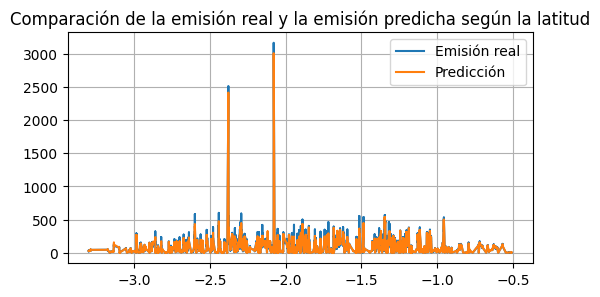

In [ ]:
# Graficando la emisión real y la predicha según la latitud
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(pred_errors["latitude"], pred_errors["emission"], label = "Emisión real")
ax.plot(pred_errors["latitude"], pred_errors["prediction"], label = "Predicción")
plt.title('Comparación de la emisión real y la emisión predicha según la latitud')
plt.legend()
plt.grid()
plt.show()

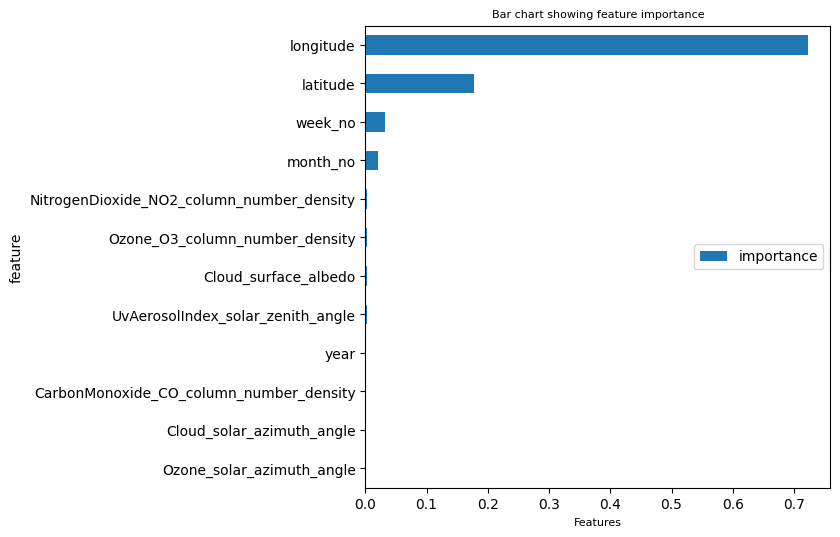

In [ ]:
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (6, 6))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 8)
plt.xlabel('Features', fontsize = 8)
plt.show()